In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


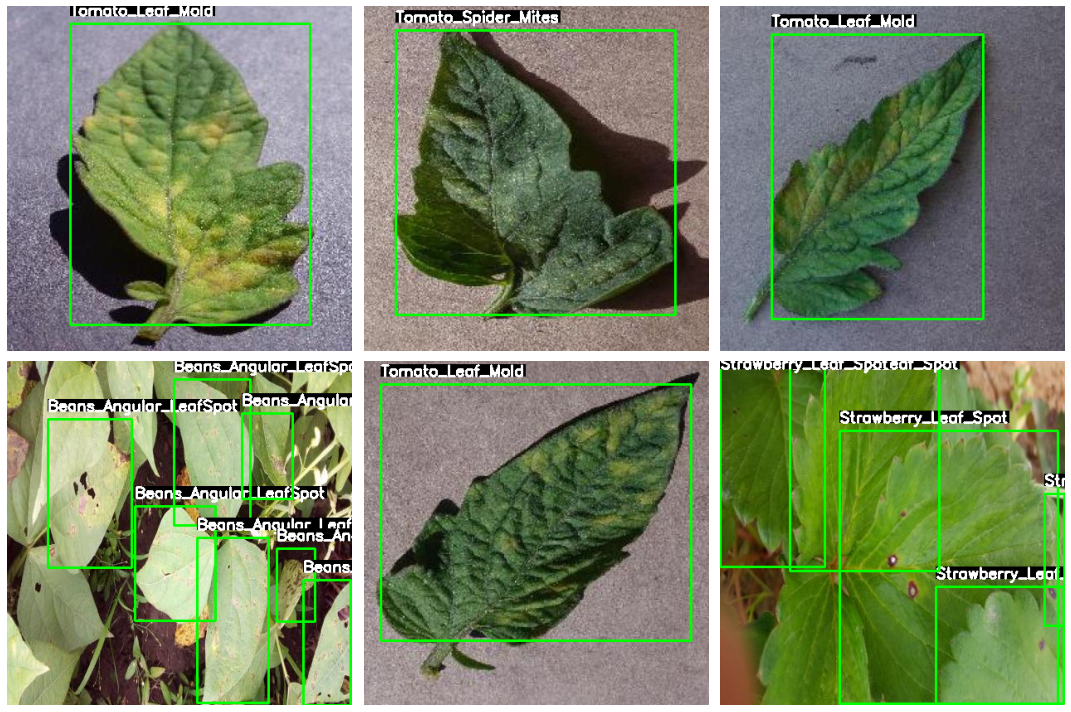

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo12s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO12s', name='Small_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.82 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO12s, name=Small_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning /home/user/CourseWork/Disease/train/labels.cache... 2904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2904/2904 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/Disease/valid/labels.cache... 1416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1416/1416 [00:00<?, ?it/s]


Plotting labels to YOLO12s/Small_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO12s/Small_try
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      4.51G      1.217       2.17      1.465         89        416: 100%|██████████| 91/91 [00:16<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.13it/s]

                   all       1416       3193      0.229      0.346       0.23     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      4.47G       1.21      1.664      1.443         95        416: 100%|██████████| 91/91 [00:13<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.28it/s]


                   all       1416       3193      0.477       0.53      0.499       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      4.51G      1.192      1.556      1.424        108        416: 100%|██████████| 91/91 [00:13<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all       1416       3193      0.394      0.387      0.338      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      4.59G      1.193      1.555      1.427        118        416: 100%|██████████| 91/91 [00:13<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.33it/s]


                   all       1416       3193      0.408       0.42      0.293      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      4.51G      1.158      1.457      1.397        123        416: 100%|██████████| 91/91 [00:13<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.38it/s]


                   all       1416       3193      0.598      0.603      0.618      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      4.59G      1.132      1.382      1.383         92        416: 100%|██████████| 91/91 [00:13<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.36it/s]


                   all       1416       3193      0.634      0.663       0.67      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      4.52G      1.097      1.295      1.361         88        416: 100%|██████████| 91/91 [00:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.41it/s]

                   all       1416       3193       0.62      0.658      0.666      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      4.61G      1.071      1.242       1.34         94        416: 100%|██████████| 91/91 [00:13<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.44it/s]

                   all       1416       3193      0.633      0.663      0.673      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80       4.5G      1.057       1.22      1.336        120        416: 100%|██████████| 91/91 [00:13<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.41it/s]

                   all       1416       3193      0.647      0.672      0.692      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      4.59G      1.028      1.189      1.317         82        416: 100%|██████████| 91/91 [00:13<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]

                   all       1416       3193      0.749      0.726      0.766      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      4.49G      1.014      1.129      1.302         84        416: 100%|██████████| 91/91 [00:13<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.36it/s]

                   all       1416       3193       0.73      0.694      0.735      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80       4.6G          1      1.103      1.289         95        416: 100%|██████████| 91/91 [00:14<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.35it/s]

                   all       1416       3193      0.785       0.74      0.783      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80       4.5G      1.005      1.095      1.297         81        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.48it/s]

                   all       1416       3193      0.735      0.724      0.762      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      4.59G     0.9718      1.059       1.28         99        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]

                   all       1416       3193      0.794      0.762      0.798      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80       4.5G     0.9724      1.032      1.277        100        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]

                   all       1416       3193      0.716      0.733      0.765      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      4.59G     0.9602      1.023      1.269         96        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]

                   all       1416       3193      0.751      0.744      0.787      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80       4.5G     0.9732      1.022      1.268         79        416: 100%|██████████| 91/91 [00:14<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]

                   all       1416       3193      0.754      0.763      0.796      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80       4.6G     0.9326     0.9686      1.247        112        416: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]

                   all       1416       3193      0.776      0.757      0.792      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      4.51G     0.9283     0.9716      1.252        131        416: 100%|██████████| 91/91 [00:13<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.48it/s]

                   all       1416       3193       0.82      0.752      0.817      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80       4.6G     0.9271     0.9586      1.242        121        416: 100%|██████████| 91/91 [00:13<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.50it/s]

                   all       1416       3193      0.784      0.783      0.826      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      4.49G     0.9188     0.9694      1.242        113        416: 100%|██████████| 91/91 [00:13<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]

                   all       1416       3193      0.808      0.773      0.818      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      4.59G     0.9025     0.9126       1.23        111        416: 100%|██████████| 91/91 [00:13<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]

                   all       1416       3193      0.816      0.779      0.826      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80       4.5G     0.8996     0.9296      1.241         98        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.47it/s]

                   all       1416       3193      0.806      0.775       0.82      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80       4.6G     0.9136      0.895      1.238         92        416: 100%|██████████| 91/91 [00:13<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.51it/s]

                   all       1416       3193      0.796      0.799      0.823      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80       4.5G     0.9002     0.8881      1.225        138        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]

                   all       1416       3193      0.817      0.804      0.842      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80       4.6G     0.8723     0.8779       1.21        115        416: 100%|██████████| 91/91 [00:13<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.51it/s]

                   all       1416       3193      0.836      0.798      0.836      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      4.48G     0.8871     0.8679      1.212         97        416: 100%|██████████| 91/91 [00:13<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193      0.789      0.781      0.823      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80       4.6G     0.8765     0.8498      1.214         92        416: 100%|██████████| 91/91 [00:13<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.825      0.798      0.843      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80       4.5G     0.8599     0.8232      1.203         83        416: 100%|██████████| 91/91 [00:13<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193      0.796      0.816       0.84      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80       4.6G     0.8632      0.852      1.198        114        416: 100%|██████████| 91/91 [00:13<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]

                   all       1416       3193      0.823      0.814      0.849      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      4.51G     0.8689     0.8238      1.205         90        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.839      0.818      0.855      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      4.59G     0.8668     0.8294      1.208        109        416: 100%|██████████| 91/91 [00:13<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.63it/s]

                   all       1416       3193      0.812      0.815      0.853      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      4.49G     0.8456     0.7917      1.188        102        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]

                   all       1416       3193      0.854      0.801      0.859      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      4.58G     0.8451      0.791      1.194         86        416: 100%|██████████| 91/91 [00:13<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]

                   all       1416       3193      0.837      0.817      0.863      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      4.49G     0.8405     0.7752      1.188         89        416: 100%|██████████| 91/91 [00:13<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.842       0.82      0.861      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      4.59G     0.8339     0.7684       1.18        107        416: 100%|██████████| 91/91 [00:14<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all       1416       3193      0.843      0.816      0.868      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      4.49G     0.8354     0.7734      1.187         96        416: 100%|██████████| 91/91 [00:13<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.845      0.799      0.855      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      4.57G     0.8186      0.753      1.169         83        416: 100%|██████████| 91/91 [00:13<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193      0.823      0.827      0.854      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80       4.5G     0.8152     0.7385      1.171        115        416: 100%|██████████| 91/91 [00:13<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]

                   all       1416       3193       0.85      0.842      0.874      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      4.58G     0.8113     0.7398      1.168        107        416: 100%|██████████| 91/91 [00:14<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all       1416       3193      0.829      0.818      0.856      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      4.51G     0.8195     0.7431      1.176        104        416: 100%|██████████| 91/91 [00:13<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193      0.829      0.826      0.865      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      4.58G     0.8224     0.7437      1.174        111        416: 100%|██████████| 91/91 [00:13<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193      0.843      0.816      0.859      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80       4.5G     0.7993      0.728      1.163        110        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.847      0.823      0.872      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80       4.6G     0.8036     0.7211      1.167        106        416: 100%|██████████| 91/91 [00:13<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193       0.85       0.83      0.872      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      4.49G     0.7998      0.724      1.158         89        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]

                   all       1416       3193      0.867      0.828      0.882      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80       4.6G     0.7923     0.6921      1.151         93        416: 100%|██████████| 91/91 [00:13<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.841      0.824       0.87      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      4.49G     0.7984     0.7039      1.162        117        416: 100%|██████████| 91/91 [00:14<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.44it/s]

                   all       1416       3193      0.841      0.844      0.881      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      4.58G     0.7938     0.6957      1.153         85        416: 100%|██████████| 91/91 [00:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]

                   all       1416       3193      0.859      0.848      0.885      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80       4.5G     0.7839     0.6929      1.159        104        416: 100%|██████████| 91/91 [00:13<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.48it/s]

                   all       1416       3193      0.867      0.847       0.89      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80       4.6G     0.7757     0.6699       1.15        109        416: 100%|██████████| 91/91 [00:14<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]

                   all       1416       3193      0.871      0.847      0.886      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80       4.5G     0.7781     0.6718      1.149         92        416: 100%|██████████| 91/91 [00:13<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.63it/s]

                   all       1416       3193      0.871      0.845      0.892      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80       4.6G     0.7608     0.6506      1.132        133        416: 100%|██████████| 91/91 [00:13<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.63it/s]

                   all       1416       3193      0.855      0.854      0.888      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80       4.5G     0.7514     0.6438      1.133        110        416: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]

                   all       1416       3193      0.867      0.856      0.892      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      4.59G     0.7571     0.6441      1.136        106        416: 100%|██████████| 91/91 [00:14<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.50it/s]

                   all       1416       3193      0.827      0.838      0.884      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      4.49G     0.7688     0.6526      1.139         97        416: 100%|██████████| 91/91 [00:13<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.885      0.866      0.902      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      4.58G     0.7559     0.6434      1.138        105        416: 100%|██████████| 91/91 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]

                   all       1416       3193      0.875      0.862      0.897      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      4.49G     0.7459     0.6342      1.129        113        416: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.872      0.833      0.892      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      4.58G     0.7504     0.6215      1.128        111        416: 100%|██████████| 91/91 [00:13<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]

                   all       1416       3193      0.865      0.862        0.9      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      4.51G     0.7464     0.6252      1.127        134        416: 100%|██████████| 91/91 [00:13<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]

                   all       1416       3193      0.873      0.851      0.889      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      4.58G     0.7394     0.6237      1.122        135        416: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.878      0.862      0.898      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      4.51G     0.7316     0.6029      1.118         87        416: 100%|██████████| 91/91 [00:13<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]

                   all       1416       3193      0.891      0.858      0.903      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      4.55G      0.727     0.6113       1.12         89        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.879       0.86        0.9      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      4.51G      0.727     0.6002      1.121        121        416: 100%|██████████| 91/91 [00:12<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]

                   all       1416       3193      0.889      0.872       0.91      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80       4.6G     0.7267     0.5868      1.118         95        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all       1416       3193      0.875      0.865      0.901      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80       4.5G     0.7213     0.5828      1.116         98        416: 100%|██████████| 91/91 [00:13<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all       1416       3193      0.879      0.864      0.911      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      4.46G     0.7192     0.5872      1.116        125        416: 100%|██████████| 91/91 [00:13<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]

                   all       1416       3193      0.881      0.861      0.902      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      4.51G     0.7123     0.5805      1.107        117        416: 100%|██████████| 91/91 [00:13<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]

                   all       1416       3193       0.89      0.871      0.909      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      4.59G     0.7106     0.5704      1.107         85        416: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.65it/s]

                   all       1416       3193      0.886      0.869      0.905      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80       4.5G     0.7031     0.5578      1.105         78        416: 100%|██████████| 91/91 [00:13<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.897      0.871      0.911       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      4.58G     0.6992     0.5675      1.101        127        416: 100%|██████████| 91/91 [00:13<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all       1416       3193      0.895      0.862      0.909      0.747


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.49G     0.6025     0.4501      1.037         51        416: 100%|██████████| 91/91 [00:14<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all       1416       3193       0.88      0.862        0.9       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80       4.6G     0.5859     0.4299       1.02         62        416: 100%|██████████| 91/91 [00:13<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.895      0.875      0.914      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.48G     0.5805     0.4105      1.022         59        416: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]

                   all       1416       3193      0.895      0.881      0.914      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.58G     0.5764     0.4072      1.023         53        416: 100%|██████████| 91/91 [00:13<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.60it/s]

                   all       1416       3193       0.92       0.86      0.914      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      4.48G     0.5739     0.4038      1.019         41        416: 100%|██████████| 91/91 [00:13<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all       1416       3193      0.907      0.877      0.913      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.57G     0.5691     0.3934      1.008         45        416: 100%|██████████| 91/91 [00:12<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]

                   all       1416       3193      0.908      0.875      0.915      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      4.49G     0.5638      0.386       1.01         45        416: 100%|██████████| 91/91 [00:13<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.50it/s]

                   all       1416       3193      0.906       0.87      0.912      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      4.58G     0.5649     0.3811      1.007         51        416: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]

                   all       1416       3193      0.905      0.878      0.916      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.48G     0.5534     0.3766      1.006         46        416: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all       1416       3193      0.899       0.88      0.914      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.59G     0.5553     0.3666      1.004         46        416: 100%|██████████| 91/91 [00:12<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]

                   all       1416       3193      0.906       0.88      0.915      0.759



80 epochs completed in 0.445 hours.
Optimizer stripped from YOLO12s/Small_try/weights/last.pt, 18.9MB
Optimizer stripped from YOLO12s/Small_try/weights/best.pt, 18.9MB

Validating YOLO12s/Small_try/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLOv12s summary (fused): 159 layers, 9,235,524 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.43it/s]


                   all       1416       3193      0.905      0.882      0.916      0.759
Beans_Angular_LeafSpot         83        277       0.73      0.704       0.72      0.461
            Beans_Rust         97        463      0.794       0.81      0.873      0.632
Strawberry_Angular_LeafSpot        166        193      0.963      0.952      0.969      0.799
Strawberry_Anthracnose_Fruit_Rot         47         85      0.888      0.882        0.9      0.661
Strawberry_Blossom_Blight        104        161      0.931          1      0.995      0.906
  Strawberry_Gray_Mold        192        200      0.928      0.909      0.938      0.663
  Strawberry_Leaf_Spot        199        779      0.899      0.843      0.923      0.843
Strawberry_Powdery_Mildew_Fruit         77        151      0.927      0.762      0.862       0.68
Strawberry_Powdery_Mildew_Leaf        155        584      0.853      0.752      0.854      0.729
         Tomato_Blight        100        100      0.967       0.99      0.9

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f202376e1a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:
df = pd.read_csv('YOLO12s/Small_try/results.csv')

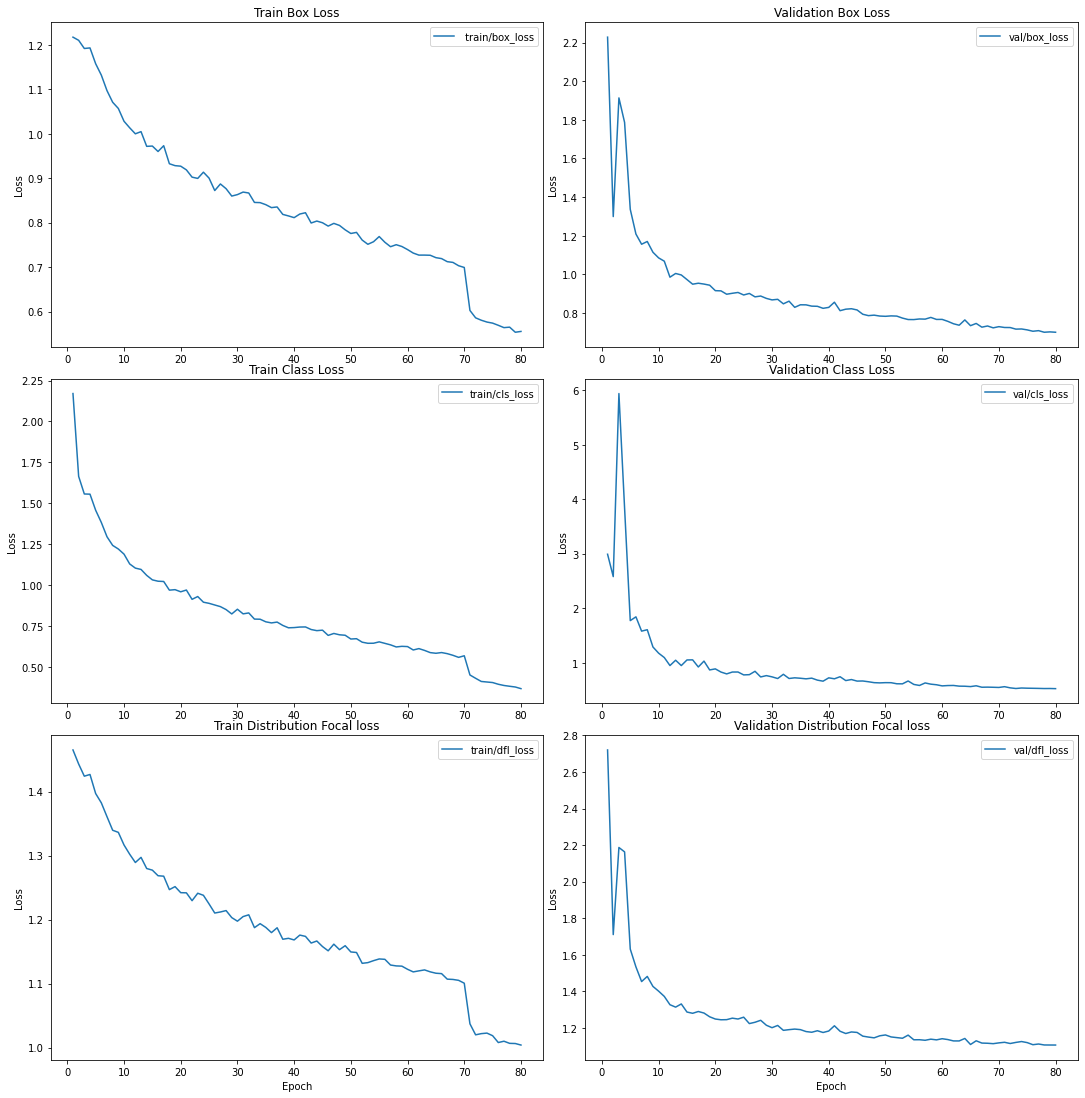

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

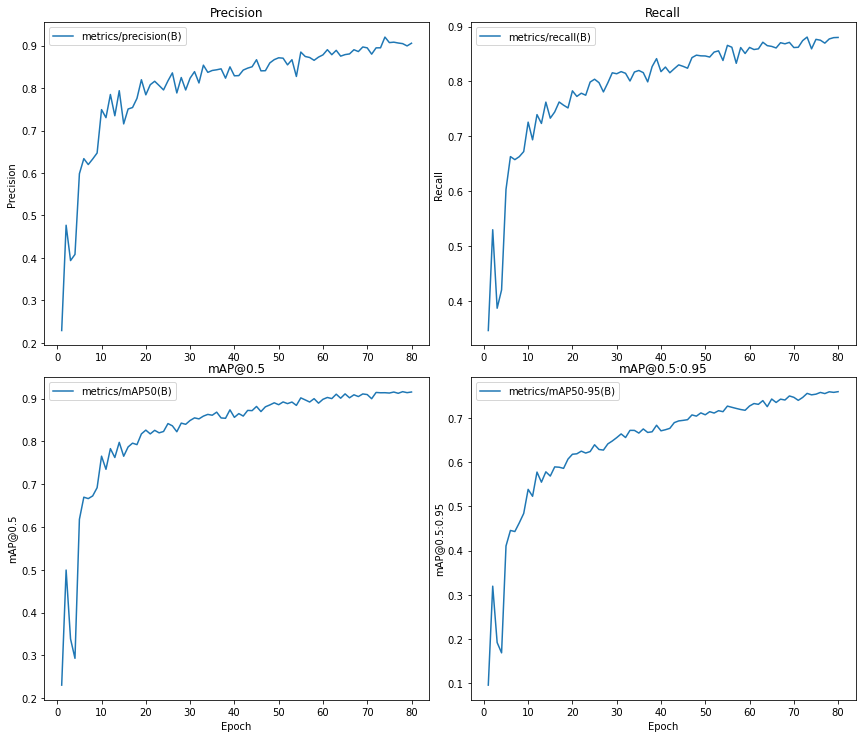

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

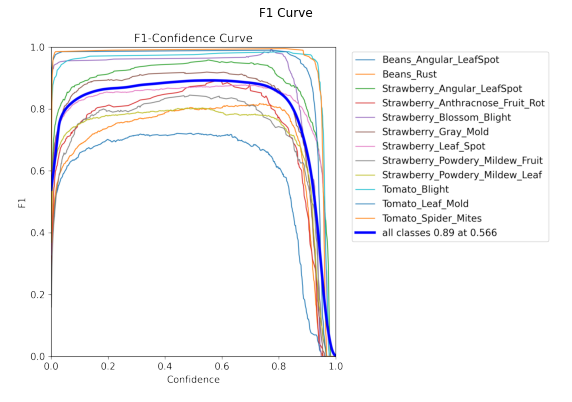

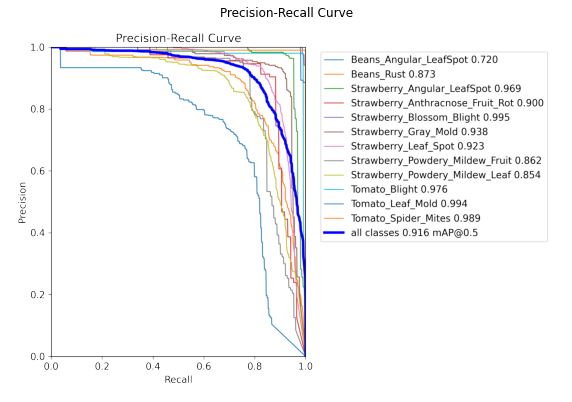

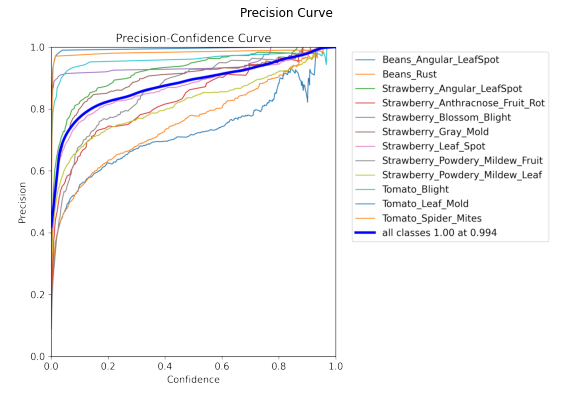

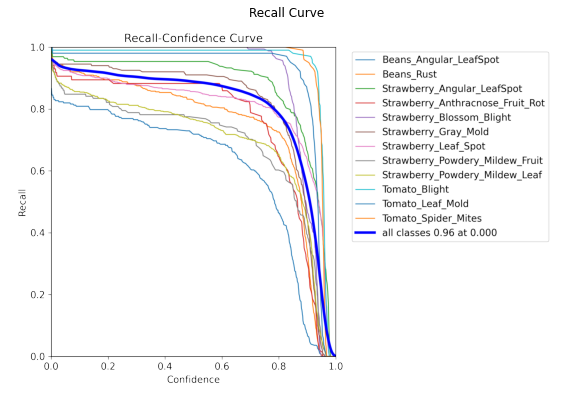

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO12s/Small_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO12s/Small_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO12s/Small_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO12s/Small_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

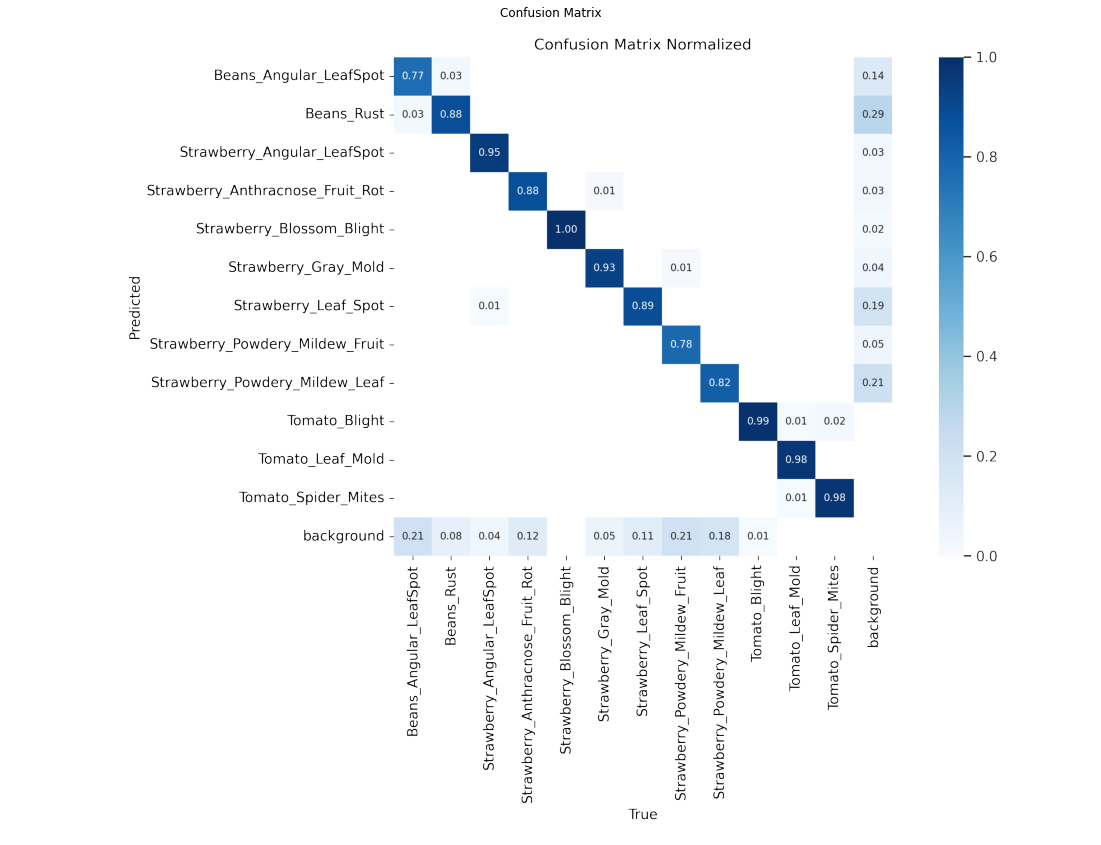

In [10]:
confusion_matrix = Image.open("YOLO12s/Small_try/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/Disease/test/images/powdery_mildew_leaf238_jpg.rf.3df979c94f80a7e45f0a687d325b1d42.jpg: 416x416 6 Strawberry_Powdery_Mildew_Leafs, 14.5ms
Speed: 0.7ms preprocess, 14.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


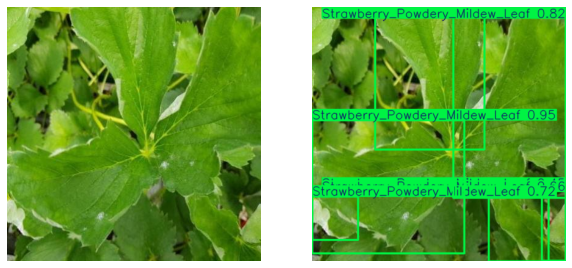

In [11]:
res = model('test/images/powdery_mildew_leaf238_jpg.rf.3df979c94f80a7e45f0a687d325b1d42.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/powdery_mildew_leaf238_jpg.rf.3df979c94f80a7e45f0a687d325b1d42.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();